# Lab session 4: Gradient descent
---
## Representation of signals & inverse problems - G1-G2

---
## Instructions (read carefully before you start)

Carefully read the instructions below before starting the lab.

- Retrieving resources for the lab
    - Place the `.zip` archive in a local folder (Computer -> Documents/TDS/).
    - Unzip the archive `.zip`.
    - Rename the folder with the convention `TP4_Name1_Name2`
    - Duplicate the notebook file and rename it `TP4_Name1_Name2.ipynb`
    - At the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (**do not leave your work on the `C:` drive**).
- If needed, an excellent tutorial on the use of Python for scientific computing can be found in the [Scipy lecture notes](https://scipy-lectures.org/).
- Execute the code cell below to load all the libraries used in this lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # to be used later on for plotting
from PIL import Image # library to load images

## Contents and objective

This lab is divided into two part. The first part summarizes the theoretical notions used throughout this lab, and does not contain any question. The second part contains 3 exercises, which will guide you through the following
1. introduction to gradient descent on a toy example;
2. image denoising with the gradient descent;
3. image inpainting with the projected gradient descent.

### Contents <a name="content"></a>
1. [Theory](#theory)
    1. [Gradient descent](#gradient_descent)
    2. [Projected gradient descent](#proj_gradient_descent)
    3. [Inverse problems and discrete gradient operator](#inv_pb)
2. [Exercises](#questions)
    1. [A gentle introduction to gradient descent](#ex_1)
    2. [Image denoising with the gradient descent](#ex_2)
    3. [Image inpainting with the projected gradient descent](#ex_3)

---
## Theory <a name="theory"></a> [[back to top](#content)]

### Gradient descent <a name="gradient_descent"></a> (for [Exercise I](#ex_1) and [Exercise II](#ex_2))

Consider the minimization of a convex smooth function $f : \mathbb{R}^N \rightarrow \mathbb{R}$, expressed as
$$\underset{x \in \mathbb{R}^N}{\min} f(x).$$

In this setting, a solution to the above problem can be estimated with the *gradient method*, which  iteratively computes

$$ x^{(k+1)} = x^{(k)} - \tau \nabla f(x^{(k)}), $$

starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, where $\nabla f(x) \in \mathbb{R}^N$ is the gradient of $f$ at $x$. 

The sequence $(x^{(k)})_{k\in\mathbb{N}}$ is guaranteed to converge to a minimizer $x^\star$ of $f$ whenever the stepsize verifies 
$$0 < \tau < 2/\beta$$
where $\beta$ is a Lipschitz constant of $\nabla f$, that is, 
$$ \forall (x,x') \in \mathbb{R}^N \times \mathbb{R}^N, \quad
      \Vert \nabla f(x) - \nabla f(x') \Vert_2 \leq \beta \Vert x-x' \Vert_2. $$

> **Remark**: For instance, if $f$ is of class $\mathscr{C}^2$, $$\beta= \sup_{x} \Vert Hf(x) \Vert$$
where $Hf(x) \in \mathbb{R}^{N \times N}$ is the Hessian of $f$ at $x$ and $\Vert \cdot \Vert$ is the spectral operator norm (largest eigenvalue). 

### Projected gradient descent <a name="proj_gradient_descent"></a> (for [Exercise III](#ex_3))

For some applications, the problem consists in minimizing a smooth convex cost function $f$, subject to the constraint that the solution belongs to a closed convex set $\Omega \subset \mathbb{R}^N$. The optimization problem can be formulated as
$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x)\quad\mbox{s.t.}\quad x\in\Omega \equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x) + \iota_{\Omega}(x)$$
where $\iota_{\Omega}$ is the indicator function of the set $\Omega$ ($\iota_{\Omega}(x) = 0$ if $x \in \Omega$, $+\infty$ otherwise).

Starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, a natural extension of the gradient descent, the *projected gradient descent*, iteratively computes
$$ x^{(k+1)} = P_\Omega\big(x^{(k)} - \tau \nabla f(x^{(k)})\big), $$

where $k \in \mathbb{N}$, and $P_\Omega$ is the orthogonal projector onto $\Omega$ (since $\Omega$ is a closed convex set, the projection exists and is unique). Note that $P_\Omega$ is the proximal operator of the indicator function: the projected gradient descent is thus a special case of the proximal gradient descent introduced in the lecture. Convergence of the iterates $x^{(k)}$ to a solution $x^\star$ of the problem is guaranteed, provided that $0<\tau<2/\beta$ (with $\beta$ the Lipschitz contant of $\nabla f$).

### Inverse problems and discrete gradient operator <a name="inv_pb"></a> (for [Exercise II](#ex_2) and [Exercise III](#ex_3))

#### Generalities
An imaging inverse problem consists in estimating an unknown image $\bar{x}$ from data $y$ containing partial, degraded information about $\bar{x}$. We consider a forward model of the form

$$y=A\bar{x} + n$$

where $A$ is a known linear observation/degradation operator, and $n$ a realization of a random vector. We further assume that the noise is white and Gaussian. 

In general, the operator $A$ is not invertible, which makes the problem ill-posed. Prior information about the is thus needed to regularize the problem and make it well-posed. 

#### Imaging inverse problems <a name="imaging_inverse_problem"></a>

- For imaging applications, $x \in \mathbb{R}^{N_1 \times N_2}$. In practice, the image $x$ can be stored either as a matrix, or as a vector in $\mathbb{R}^{N}$, with $N = N_1 N_2$ (*e.g.*, by stacking the columns or the rows of $x$). In the rest of this lab, we will slightly abuse notations by using the same notation $x$, whether the image is considered in matrix or vector form.

- **Tikhonov regularization**: $\bar{x}$ can be estimated as a solution to 
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|Ax-y\|^2_{\text{F}} + \frac{\lambda}{2}\|Dx\|^2_{\text{F}}$$
where $D$ a linear operator to be specified, $\lambda > 0$ is a regularization parameter whose value depends on the noise level, and $\|\cdot\|_F$ is the Frobenius norm

\begin{equation}
    (\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \|x\|_F^2 = \sum_{n_1, n_2} x_{n_1, n_2}^2.
\end{equation}

Gradient descent can be used to solve the above problem, since the objective function to be minimized is smooth (quadratic). In addition
$$(\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \nabla f(x) = A^*(Ax-y) + \lambda D^*Dx = (A^*A + \lambda D^*D)x - A^*y.$$

Note that the expression of the operators $A^*A$ (where $A^*$ is the adjoint of $A$) and $D^*D$ are needed to compute $\nabla f(x)$.

- **Regularization of natural images**: Natural images exhibit smooth spatial variations of the pixels values, implying that their discrete gradient has a low energy. This motivates the use of Tikhonov regularization based on the discrete gradient, as illustrated in the next paragraph.

#### Discrete gradient: definition and illustration (useful for [exercise III](#ex_3))

- **Definition**: The discrete gradient is fundamental in image processing to encode prior knowledge about the spatial content of the image. It is defined as a linear operator $D : \mathbb{R}^{N_1 \times N_2} \rightarrow \mathbb{R}^{N_1 \times N_2} \times \mathbb{R}^{N_1 \times N_2}$ mapping an image to a pair of images, obtained by computing vertical and horizontal differences between the pixel values, respectively. Assuming von Neumann boundary conditions (*i.e.*, a difference accross a boundary is set to 0), the operator can be defined as

\begin{equation}
    Dx = (D_V x, D_H x)
\end{equation}
with

\begin{align}
    D_V x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_2 \in \{0, \dotsc, N_2-1\}) \; (D_V x)_ {n_1, n_2} = \begin{cases}
     x_{n_1+1,n_2}-x_{n_1,n_2} \mbox{ if } n_1 \in \{0, \dotsc, N_1-2\} \\
     0 \mbox{ otherwise.}
    \end{cases} \\
    %
    D_H x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_1 \in \{0, \dotsc, N_1-1\}) \; (D_H x)_ {n_1, n_2} = \begin{cases}
     x_{n_1,n_2+1}-x_{n_1,n_2} \mbox{ if } n_2 \in \{0, \dotsc, N_2-2\} \\
     0 \mbox{ otherwise.}
    \end{cases}
\end{align}


In the rest of this lab, we will consider the quantity $\|Dx\|_F^2$, defined as 

\begin{equation}
    \|Dx\|_F^2 = \|D_V x\|_F^2 + \|D_H x\|_F^2 = \sum_{n_1, n_2} (D_V x)^2_{n_1,n_2} + (D_H x)^2_{n_1,n_2}.
\end{equation}

- **Illustration and example codes**: 

a) We first load a ground truth image $\bar{x}$ and display it.

In [2]:
# Load the image

imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


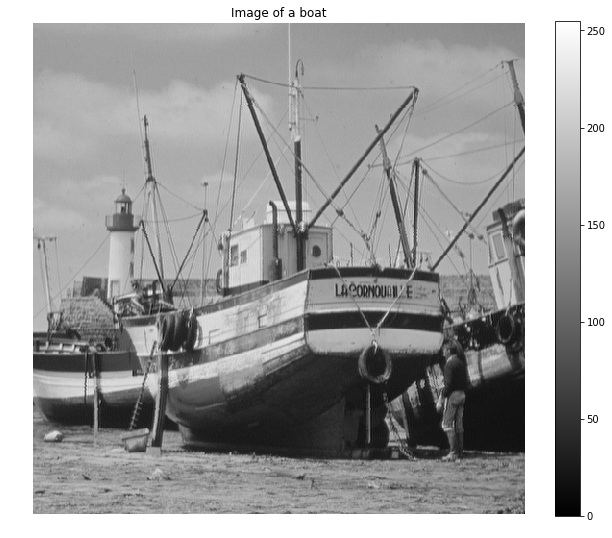

In [3]:
# Display the image

plt.figure(figsize=(11,11))
plt.imshow(x_bar, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
# Without specifying vmin and vmax, imshow auto-adjusts its range so that black and white are
# the min and max of the data, respectively.
plt.colorbar()       # displays the color bar close to the image
plt.axis('off')      # remove the axes (comment to restore axes)
plt.subplots_adjust(top=0.75)
plt.title('Image of a boat')
plt.show()

b) We implement the discrete gradient operator $D$ in a Python function

In [4]:
def D(x):
    vdiff = np.r_[np.diff(x,1,0), np.zeros([1,x.shape[1]])] # the r_ command concatenates along the rows
    hdiff = np.c_[np.diff(x,1,1), np.zeros([x.shape[0],1])] # the c_ command concatenates along the columns
    return np.concatenate((vdiff[...,np.newaxis], hdiff[...,np.newaxis]), axis=2) # combination along a third dimension
# An alternative, more compact, definition:
#D = lambda x : c_['2,3',r_[np.diff(x,1,0), np.zeros([1,x.shape[1]])],c_[np.diff(x,1,1), np.zeros([x.shape[0],1])]]

## Apply the function to the reference image
v = D(x_bar)

and display the two components of $D\bar{x}$ as two grayscale images.

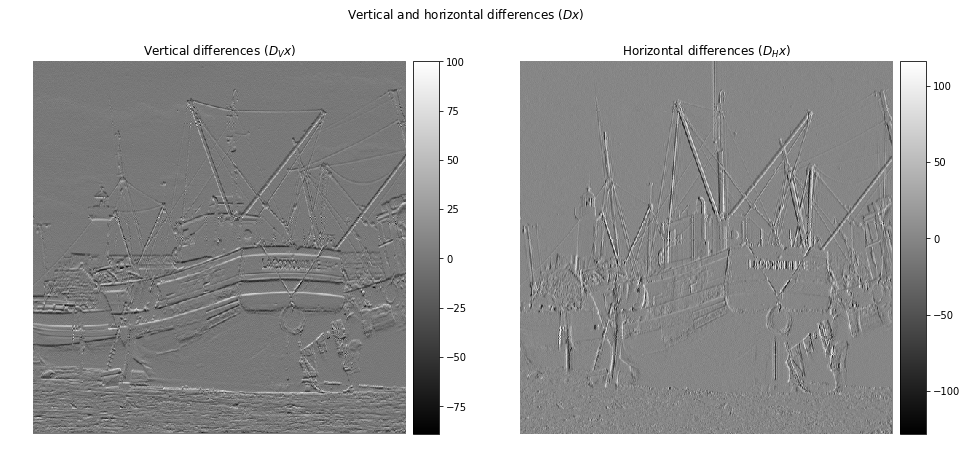

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle(r"Vertical and horizontal differences ($Dx$)")
imv=axv.imshow(v[:,:,0], cmap=plt.cm.gray)
imh=axh.imshow(v[:,:,1], cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Vertical differences ($D_V x$)')
axh.set_title('Horizontal differences ($D_H x$)')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()

c) Displaying the quantity $\|D\bar{x}\|_F = \sqrt{\|D_V \bar{x}\|^2_F + \|D_H \bar{x}\|^2_F}$,

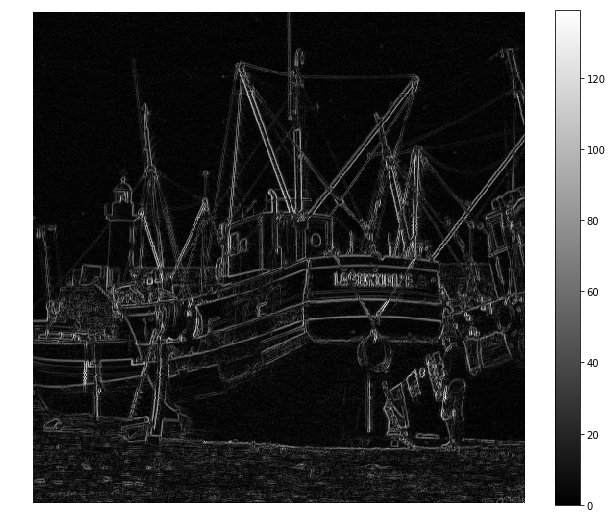

In [7]:
plt.figure(figsize=(11,11))
plt.imshow(np.sqrt(np.sum(v**2,2)), cmap=plt.cm.gray, vmin=0)
plt.colorbar()  
plt.axis('off')
plt.subplots_adjust(top=0.75)

we observe that the energy is concentrated around edges, and relatively low in other pixels. This indicates that the magnitude of the pixels in the discrete gradient appears to be relatively low, except on the edges.

d) Finally, we implement the adjoint of the discrete gradient operator

In [8]:
def D_adj(v): 
    return np.r_['0,2',-v[0,:,0],-np.diff(v[:-1,:,0],1,0),v[-2,:,0]] + np.c_['1,2',-v[:,0,1],-np.diff(v[:,:-1,1],1,1),v[:,-2,1]]

$D^*$ can be viewed as the opposite of a discrete divergence operator. One can check that $\|D x\|^2 - \langle D^*Dx, x \rangle=0$ to verify that the two operators are adjoint.

In [9]:
(D(x_bar)**2).sum() - (D_adj(D(x_bar))*x_bar).sum()

0.0

---
## Exercises 

### I. A gentle introduction to gradient descent <a name="ex_1"></a> [[back to top](#content)]

Consider the minimization of a quadratic form in $\mathbb{R}^2$ ($N=2$)
$$ f(x) = \frac{1}{2} \bigl( x_1^2 + \eta x_2^2 \bigr)$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

We first define the anisotropy parameter $\eta$ and the function $f$

In [10]:
eta = 8
f = lambda x : (x[:, 0]**2 + eta*x[:, 1]**2) / 2

>**Note**: a **lambda function** is a one-line function definition, which captures the value of other variables (in the example above, `eta`).
>
> A simple example:
> ```python
>>> a = 1
>>> test_lambda_function = lambda x : x + a
>>> #apply the function to the input value 2
>>> print(test_lambda_function(2))
3
>>> #modify the value of a
>>> a = 2
>>> #same result as before: a was equal to 1 when the function 
>>> #was defined
>>> print(test_lambda_function(2)) 
4
```

We display the values taken by the function using a contourplot.

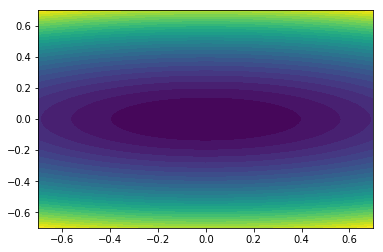

In [11]:
# plt.figsize(6,6)
t = np.linspace(-.7,.7,101)
[u,v] = np.meshgrid(t,t)
F = (u**2 + eta*v**2) / 2
plt.contourf(t,t,F,35)
plt.show()

We define the gradient of $f$:

In [12]:
grad_f = lambda x : np.array([x[0], eta*x[1]])

Since $f$ is quadratic, its Hessian is the constant matrix $\left(\begin{array}{cc}1&0\\0&\eta\end{array}\right)$. Its spectral norm, which is the Lipschitz constant of `grad_f`, is $\beta=\max(1,\eta)$. Since the stepsize $\tau$ must satisfy $0< \tau < 2/\beta$, we take

In [13]:
tau = 1.8/max(eta,1); tau

0.225

Now we implement the gradient descent method: given the initial estimate $x^{(0)}$ of the solution, the stepsize $\tau$ and the number $k$ of iterations, we compute $x^{(k)}$:

In [14]:
nbiter = 10
x = np.array([1,1])         # initial estimate of the solution
for iter in range(nbiter):  # iterations from 0 to nbiter-1
    x = x - tau*grad_f(x)
print(x)                    # display the value of the solution

[0.07816584 0.10737418]


We encapsulate the above code in a function `gradient_descent`.

In [15]:
def gradient_descent(x0, grad_f, tau, nbiter):
    x = x0;
    for iter in range(nbiter):  # iterations from 0 to nbiter-1
        x = x - tau*grad_f(x)
    return x

In [16]:
gradient_descent([1,1], grad_f, tau, 10)

array([0.07816584, 0.10737418])

We modify the previous `gradient_descent` function to store the iterates in a matrix (2-D array).

In [17]:
def gradient_descent(x0, grad_f, tau, nbiter):
    
    X = np.zeros((nbiter+1, x0.size))
    X[0, :] = x0;
    for iter in range(nbiter):  
        X[iter+1, :] = X[iter, :] - tau*grad_f(X[iter, :])     
    return X

In [18]:
X = gradient_descent(np.array([0.6,0.6]), grad_f, 0.225, 30)

We plot the cost function $f(x^{(k)})$ as a function of $k$, in log-scale:

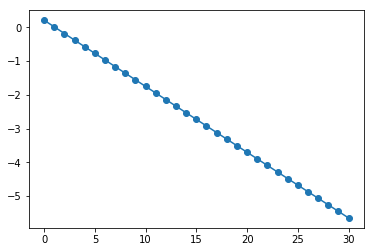

In [21]:
plt.plot(range(X.shape[0]),np.log10(f(X)),'o-')
plt.show()

Observe that the gradient descent algorithm is monotonic, in that $f(x^{(k)})$ decreases from one iteration to another.

We plot the iterates above the contourplot of $f$:

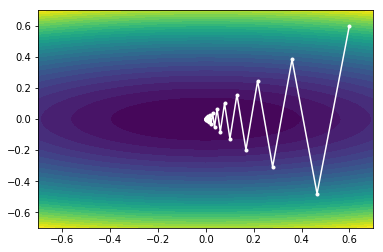

In [22]:
# figsize(8,8)
plt.contourf(t,t,F,35)
plt.plot(X[:,0], X[:,1], 'w.-')
plt.show()

### Questions:

1. Adapt the previous cells to run the algorithm with different values of tau (try 0.25,0.225,0.2,0.05). Qualitatively, is the algorithm converging for each of these values? For which value does it converge the fastest to the solution?
2. Try a different initial estimate (e.g., a randomly generated one). Does the algorithm still converge to the solution of the problem? Justify your statement with a theoretical argument from the lectures.

1. In the figures below, we can see that the algorithm converges for all of the values of $\tau$ except for 0.25. This is expectable, since this value of $\tau$ is equal to $2/\beta$, so it doesn't satisfy the condition on the stepsize. Furthermore, we can observe that it converges the fastest with $\tau=$ 0.2. Indeed, for this value, the algorithm reaches the central contour by the 5th iteration, as opposed to the 9th and 10th iterations for $\tau=$ 0.225 and $\tau=$ 0.05, respectively.

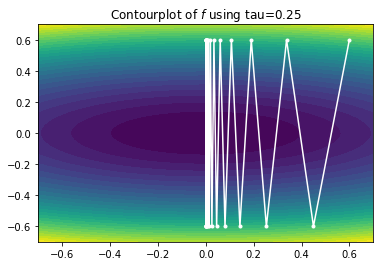

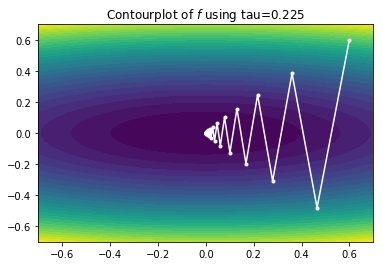

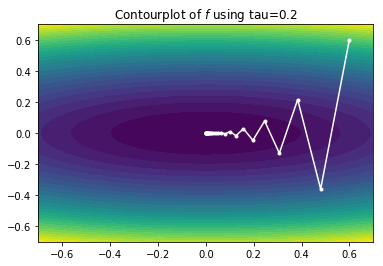

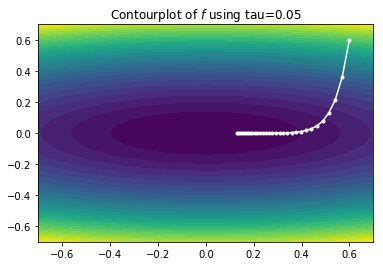

In [26]:
# code for question 1 #
taus=[0.25, 0.225, 0.2, 0.05]

for tau in taus :
    X = gradient_descent(np.array([0.6,0.6]), grad_f, tau, 30)
    # figsize(8,8)
    plt.contourf(t,t,F,35)
    plt.plot(X[:,0], X[:,1], 'w.-')
    plt.title("Contourplot of $f$ using tau="+str(tau))
    plt.show()

Question 2. We tried different randomly generated values for the initial estimate used as input in the algorithm, and each time, the algorithm converged to the solution of the problem. This can be justified by the theorem of convergence of the gradient descent algorithm. Indeed,  
- $f$ is proper (it has values different from $+\infty$, and it doesn't have $-\infty$ as a value), 
- $f$ is convex (the determinant of it's Hessian matrix is positive and 1, the value at the top-left position, is positive as well)
- $f$ is continuous (which implies that it is lower semi-continuous), 
so $f \in \Gamma_0(\mathbb{R}^2)$.

Furthermore, $f$:
- is coercive ($f(x)$ heads towards $+\infty$ when $\Vert x \Vert (\in \mathbb{R}^2$) approaches $+\infty$).
- is differentiable
- has a Lispchitz value equal to $\max(1, \eta)$.

Thus, all the conditions for the above-mentioned theorem are respected, and the algorithm converges for $x^{(0)} \in \mathbb{R}^2$.

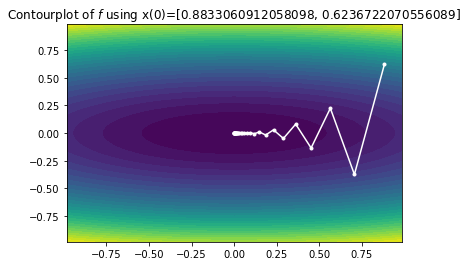

[0.88330609 0.62367221]


In [79]:
# code for question 2 #

x0=np.random.rand(2)
t = np.linspace(-max(abs(x0[0]), abs(x0[1]))-0.1,max(abs(x0[0]), abs(x0[1]))+0.1,101)
[u,v] = np.meshgrid(t,t)
F = (u**2 + eta*v**2) / 2

X = gradient_descent(x0, grad_f, 0.2, 30)
# figsize(8,8)
plt.contourf(t,t,F,35)
plt.plot(X[:,0], X[:,1], 'w.-')
plt.title("Contourplot of $f$ using x(0)=["+str(x0[0])+", "+str(x0[1])+"]")
plt.show()
print(x0)

---
### II. Image denoising with the gradient descent <a name="ex_2"></a> [[back to top](#content)]

Denoising an image $y \in \mathbb{R}^{N_1\times N_2}$ can be seen as a special instance of the problem described in the [theory paragraph above](#imaging_inverse_problem) with $A = I$, the identity operator. Assuming the noise corrupting the data is white and Gaussian, of variance $\sigma^2$, denoising can be formulated as 
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|x-y\|_F^2+\frac{\lambda}{2}\|Dx\|^2_F.$$

> Note that $x$ belongs to a Euclidean space of dimension $N=N_1 N_2$, which is the number of pixels composing the image.

> For numerical applications, we will consider $\lambda = 8$.

#### Generating synthetic data

1\. **[Python]** Load a ground truth image with Python, stored in a variable `x_bar` (you can use the sample code given in the [Theory](#theory) section).

In [138]:
# Load the image (use example code from the theory section)
# Complete the code below
imgpil = Image.open("img/lena.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("The size of the image is %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("The range of the pixel values is [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
The size of the image is 512 x 512.
The range of the pixel values is [25,245].


2\. **[Theory/Python]** The input signal-to-noise ratio (iSNR) is defined as

\begin{equation}
    \text{iSNR} = 10\log_{10} \biggl( \frac{\|y_0\|_{\text{F}}^2}{N\sigma^2} \biggr)
\end{equation}

where $y_0 \in \mathbb{R}^{N_1\times N_2}$ denotes the noiseless data (i.e., $y_0 = \bar{x}$ for the denoising problem), and $\sigma^2$ is the variance of the white Gaussian noise.

a) Give the expression of $\sigma^2$ in function of the $\text{iSNR}$. Complete the code cell below to compute its value for $\text{iSNR} = 40$ dB, and generate the noisy data using the measurement model

\begin{equation}
    y = \bar{x} + n = y_0 + n
\end{equation}

with $n$ a realization of the random vector $\underline{n} \sim \mathcal{N}(0, \sigma^2 I)$.

> Hint: 
> - generating random variables: as an example, independent, identically distributed uniform random variables can be generated with the following piece of code
> ```python
> rng = np.random.RandomState(0) # set random seed
> rv = rng.uniform(2,2)          # generate i.i.d uniform random variables
> ```
> - to generate a Gaussian random variable, take a look at the documentation of the numpy function `numpy.random.normal` [(doc. here)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)
> - to compute the norm of a vector, take a look at the documentation of the numpy function `numpy.linalg.norm` [(doc. here)](https://numpy.org/doc/1.18/reference/generated/numpy.linalg.norm.html)

a. As implemented in the code below,
\begin{equation}
    \sigma^2  = \frac{\|y_0\|_{\text{F}}^2}{N10^{\frac{\text{iSNR}}{10}}}
\end{equation}

In [139]:
# complete instructions below
from numpy import linalg as LA
(N1,N2) = x_bar.shape

# set the random seed (ensures reproducible results when generating random variables)
# rng = np.random.RandomState(0)

isnr = 20    # input SNR (in dB)
sigma2 = (LA.norm(x_bar)**2)/(N1*N2*10**(isnr/10))

n=np.random.normal(0.0, np.sqrt(sigma2), (N1,N2))
y = x_bar + n      # noisy data

b) Display the noisy image and the ground truth (with a gray colorbar).

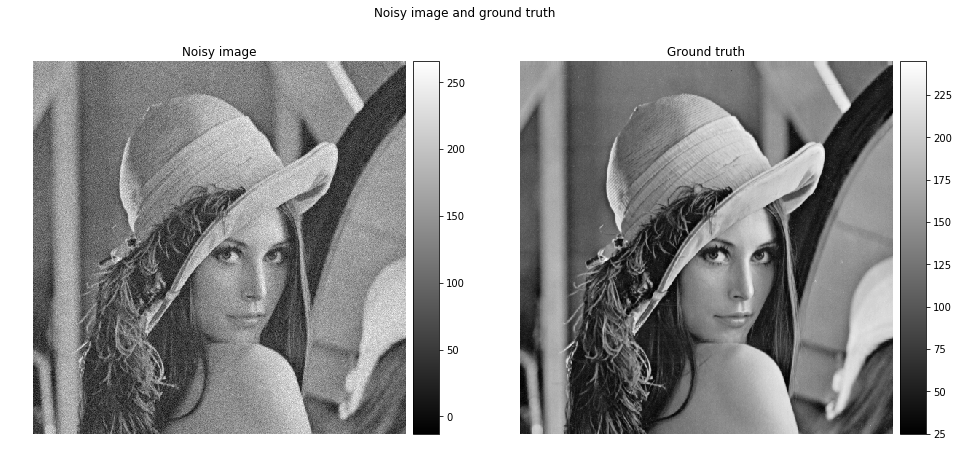

In [140]:
fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle(r"Noisy image and ground truth")
imv=axv.imshow(y, cmap=plt.cm.gray)
imh=axh.imshow(x_bar, cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Noisy image')
axh.set_title('Ground truth')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()

#### Gradient descent algorithm

3\. **[Theory/Python]**: Give the expression of $\nabla f$ for this denoising problem. Implement a Python function `grad_f` to compute its value, using the discrete gradient `D` and its adjoint `D_adj`.

```python
def grad_f(x, y, Lambda):
    # return ?
```

Your answers (complete this cell with your observations)

In [103]:
def grad_f(x, y, Lambda):
    return x + Lambda*D_adj(D(x)) - y

4\. **[Python]**: The expression of the Lipschitz constant $\beta$ can be taken as $\|I+\lambda D^*D\|=1+8\lambda$. Using this information and the function `grad_f` implemented in 3., apply the gradient descent algorithm ($\approx$ 100 iterations) to estimate a solution to the denoising problem. Make sure the function returns both the final estimate and the values $(f(x^{(k)}))_k$.

> Hint: use the example gradient descent introduced in the first [exercise](#ex_1).

In [135]:
# your code: complete the elements given below

def gradient_descent(grad_f, y, Lambda, x0, nbiter, tau):
    x = x0;
    for iter in range(nbiter):
        x = x - tau*grad_f(x, y, Lambda)
    return (x, (LA.norm(x-y)**2)/2 +(Lambda/2)*(LA.norm(D(x))**2))

In [141]:
Lambda = 8
tau = 1.9/(1+8*Lambda)

# to be completed #
x0= np.random.randint(245, size=y.shape)
(x_est,f_x_est)= gradient_descent(grad_f, y, Lambda, x0, 100, tau)

#### Interpretation of the results

5\. **[Theory/Python]**: Display the denoised and the ground truth image. What do you observe? Are details well recovered? Conclude about the relevance of Tikhonov regularization for denoising natural images.

5. We can see below that the denoising was effective, and even a tad too effective. The large invariant zones of the image were correctly smoothed out, but the limits between these areas (so the different edges within the image) were smoothed out as well. Thus, we cannot correctly recover the details of the ground truth image. We also observe that this denoising method doesn't allow the recovery of extreme values: instead of having values between 25 and 245, the pixels of the denoised image have values between 40 and 215 on average. In conclusion, spatial variations have to be extremely smooth in order to recover the details of the ground truth using Tikhonov regularization.

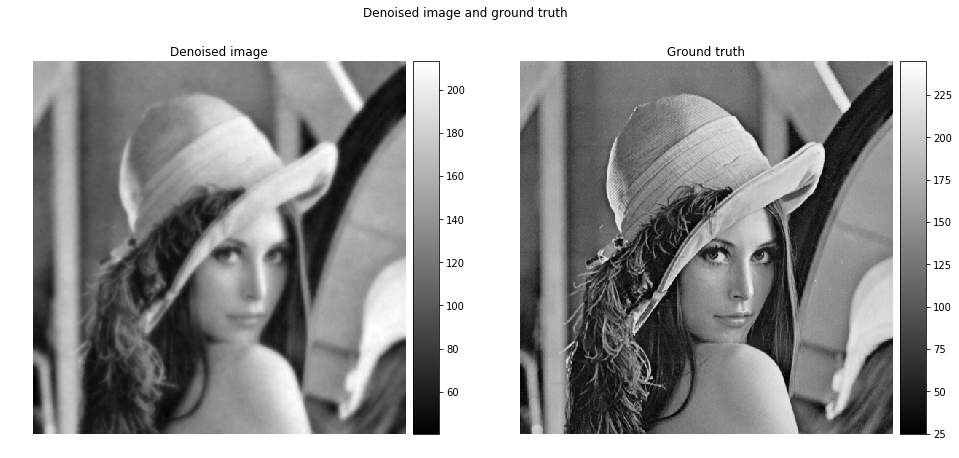

40.43001683769814 213.26037738241683


In [142]:
# your codes

fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle(r"Denoised image and ground truth")
imv=axv.imshow(x_est, cmap=plt.cm.gray)
imh=axh.imshow(x_bar, cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Denoised image')
axh.set_title('Ground truth')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()
print(np.min(x_est), np.max(x_est))

---
## III. Image inpainting with the projected gradient descent <a name="ex_3"></a> [[back to top](#content)]

Inpainting consists in inferring the value of missing pixels in an image from a set of available pixels. In this section, we will recover the content of an image knowing the value of only 10% of its pixels.

We first formulate inpainting as the following optimization problem

$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^{N_1\times N_2}}{\min} \frac{1}{2}\|Dx\|_{\text{F}}^2\quad\mbox{s.t.}\quad Ax=y.$$

#### Synthetic data generation

In [209]:
# Load the image
imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


6\. **[Python]**: The degradation operator $A$ is simply pixelwise multiplication by the binary mask, and we have $A^*=A$.

Generate a random mask to select 10% of the ground truth image $\bar{x}$ to simulate a partially observed image. Generate the image to be inpainted $y$. Display the mask and the data $y$.

> Hint: you can for instance use the `np.random.rand` function to generate the mask (of the same size as the image). Another option consists in using `np.random.choice` and `np.unravel_index`.

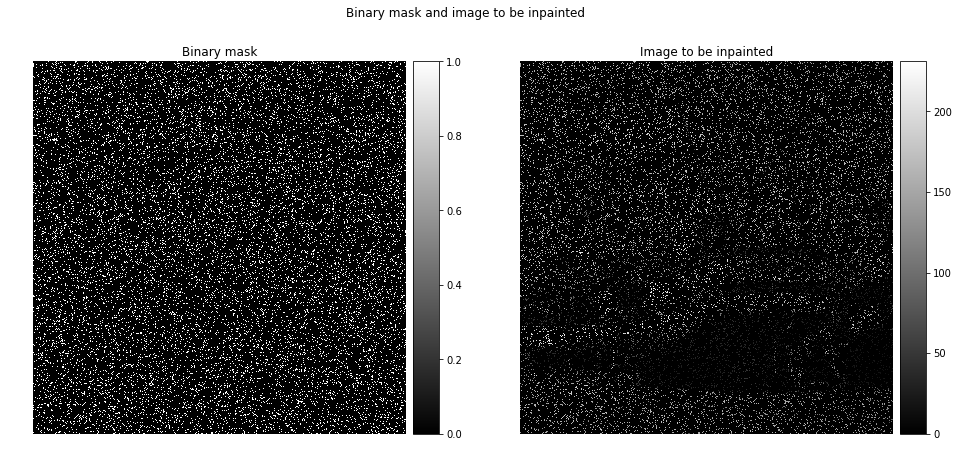

In [210]:
mask = np.random.choice(a=[0,1], size=x_bar.shape, p=[0.9,0.1])
y = mask*x_bar

# Display the binary mask and the masked image (with missing values)

fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle(r"Binary mask and image to be inpainted")
imv=axv.imshow(mask, cmap=plt.cm.gray)
imh=axh.imshow(y, cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Binary mask')
axh.set_title('Image to be inpainted')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()

#### Projected gradient descent

7\. **[Python]** Implement a function `grad_f` to compute $\nabla f$.

```python
def grad_f(x):
#     return ... ?
```

In [211]:
def grad_f(x):
    return D_adj(D(x))

8\. **[Python]** Implement a function `projection_inpainting` to compute the projection of a vector $u$ onto the closed convex set $\{x \mid Ax = y \}$.

> Hint: projecting onto this set reduces to setting $u_i = y_i$ for the indices $i$ which are not masked.

In [212]:
def projection_inpainting(u, y, mask):
    for i in range(len(y)):
        for j in range(len(y[0])):
            if (mask[i][j] > 0):
                u[i][j] = y[i][j]
    return u
    

9\. **[Python]** Knowing that $\beta=8$, implement a projected gradient algorithm to solve the inpainting problem.

```python
    def projected_gradient_descent(grad_f, projection_inpainting, y, mask, x0, nbiter, tau):
        ...
```

In [213]:
def projected_gradient_descent(grad_f, projection_inpainting, y, mask, x0, nbiter, tau):   
    x = x0;
    for iter in range(nbiter):
        x = projection_inpainting((x - tau*grad_f(x)), y, mask)
    return x 

#### Interpretation of the results

10\. **[Theory/Python]** Apply the projected gradient algorithm starting from $x^{(0)} = y$, for 300 iterations. Display the estimated image, and conclude about the efficiency of this approach.

10. By running the projected gradient algorithm, we obtain a remarkably good inpainted image out of only 10% of the ground truh image. It is genuinelly outstanding to be able to predict such an amount of information with this accuracy. We can also observe that the values for the pixels of our inpainted image go from 15 to 230, which is a very good approximation of the value range of the original image (0 to 239).

In [214]:
tau = 1.9 / 8
nbiter = 300

In [215]:
# your code...
xrestored = projected_gradient_descent(grad_f, projection_inpainting, y, mask, y, nbiter, tau)

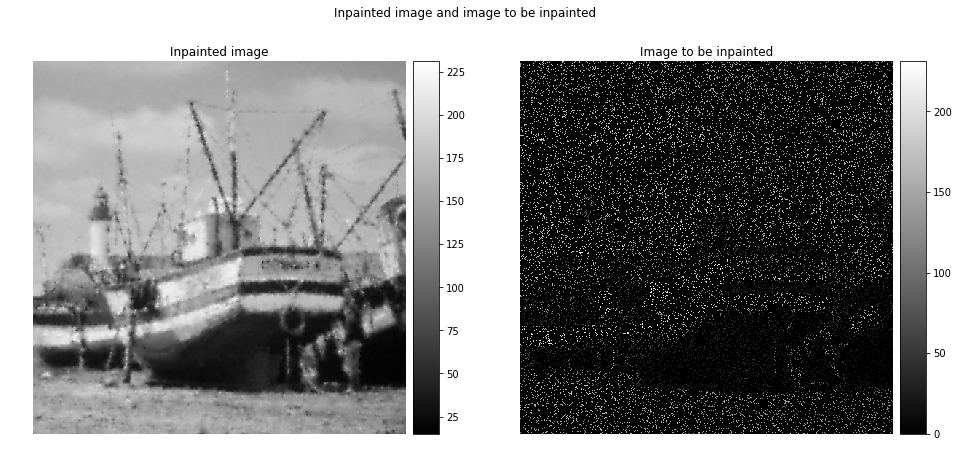

15.0 231.0


In [216]:
# display reconstructed (inpainted) image
# your code...
fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle("Inpainted image and image to be inpainted")
imv=axv.imshow(xrestored, cmap=plt.cm.gray)
imh=axh.imshow(y, cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Inpainted image')
axh.set_title('Image to be inpainted')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()
print(np.min(xrestored), np.max(xrestored))